In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import zero_one_loss
from sklearn.datasets import load_boston
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [37]:
data = load_boston()
train_X, test_X, train_y, test_y = train_test_split(data.data, data.target, test_size=0.25, random_state=33)

In [38]:
# AdaBoost
regressor = AdaBoostRegressor()
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
mse = mean_squared_error(test_y, pred_y)
print('房价预测结果：', pred_y)
print('均方误差：', round(mse, 2))

房价预测结果： [19.22941176 11.12571429 12.8        17.80631579 24.21287129 21.72222222
 29.54761905 18.45612245 31.15       19.73103448 28.16980198 32.225
 11.425      25.44193548 13.9        24.8        17.80631579 16.81
 27.65114504 25.44193548 17.93636364 18.05892857 17.80631579 19.73103448
 31.15       18.45612245 21.05525292 25.44193548 11.425      32.96632124
 17.80631579 26.73020408 11.39833333 20.77184466 27.03755656 31.68
 26.65786517 12.51129032 14.2703125  26.00740741 15.56818182 11.64375
 29.54761905 17.80631579 27.26363636 19.19032258 17.80631579 19.44480519
 26.73020408 19.44480519 17.80631579 34.04661017 15.5872093  17.93636364
 26.43591837 20.5116129  26.33862434 16.31162791 25.70934066 24.02197309
 19.44480519 16.48382353 43.71724138 20.4122807  17.56129032 26.73020408
 26.65786517 11.64375    18.79116022 27.7720339  21.72222222 18.79116022
 18.02       27.16134454 19.44480519 47.38571429 15.5872093  11.39833333
 17.74910714 24.8        20.02682927 15.85333333 13.584      26

In [39]:
# 决策树
dec_regressor = DecisionTreeRegressor()
dec_regressor.fit(train_X, train_y)
pred = dec_regressor.predict(test_X)
mse = mean_squared_error(test_y, pred_y)
print('决策树军方误差：', round(mes, 2))

决策树军方误差： 16.58


In [40]:
# KNN
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(train_X, train_y)
pred_y = knn_regressor.predict(test_X)
mse = mean_squared_error(test_y, pred_y)
print('KNN均方误差：', round(mse, 2))

KNN均方误差： 27.77


In [50]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1) # 生成二分类数据
test_X, test_y = X[:200], y[0:200]
train_X, train_y = X[2000:], y[2000:]

In [51]:
# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(train_X, train_y)
dt_stump_err = 1.0 - dt_stump.score(test_X, test_y)
dt_stump_err

0.49

In [53]:
# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)
dt_err = 1.0 - dt.score(test_X, test_y)
dt_err

0.24

In [55]:
# AdaBoost分类器
ada = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=200)
ada.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

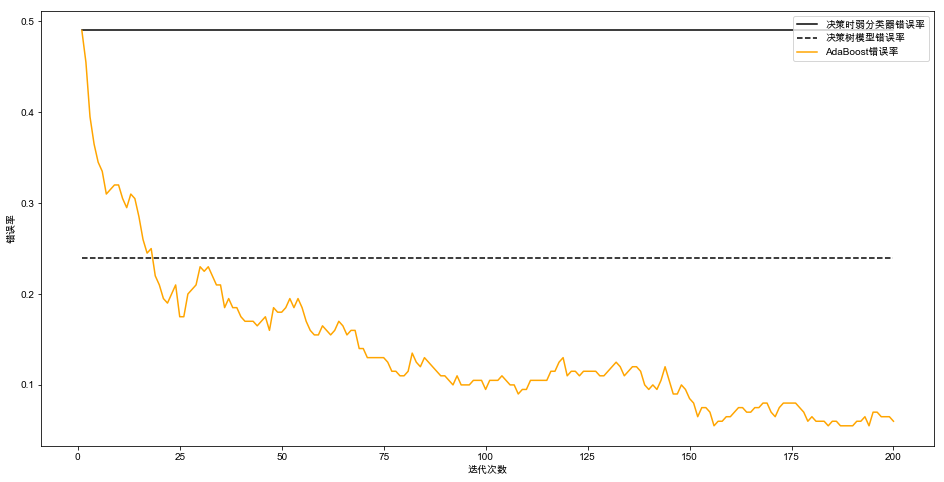

In [68]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.plot([1, 200], [dt_stump_err]*2, 'k-', label='决策时弱分类器错误率')
ax.plot([1, 200], [dt_err]*2, 'k--', label='决策树模型错误率')
ada_err = np.zeros((200,))
for i, pred_y in enumerate(ada.staged_predict(test_X)):
    ada_err[i] = zero_one_loss(pred_y, test_y)
ax.plot(np.arange(200)+1, ada_err, label='AdaBoost错误率', color='orange')
ax.set_xlabel('迭代次数')
ax.set_ylabel('错误率')
leg = ax.legend(loc='upper right', fancybox=True)
plt.show()